# Hands-on TF.3: Clustering in TensorFlow

In [16]:
import tensorflow as tf
a = tf.placeholder("float")
b = tf.placeholder("float")
y = tf.multiply(a, b)
sess = tf.Session()
print sess.run(y, feed_dict={a: 3, b: 3})

9.0


## Generar 2000 punts

Generar 2000 punts en un espai 2D de forma aleatòria.

In [20]:
num_puntos = 2000
conjunto_puntos = []
for i in xrange(num_puntos):
    if np.random.random() > 0.5:
        conjunto_puntos.append([np.random.normal(0.0, 0.9),np.random.normal(0.0, 0.9)])
    else:
        conjunto_puntos.append([np.random.normal(3.0, 0.5),np.random.normal(1.0, 0.5)])

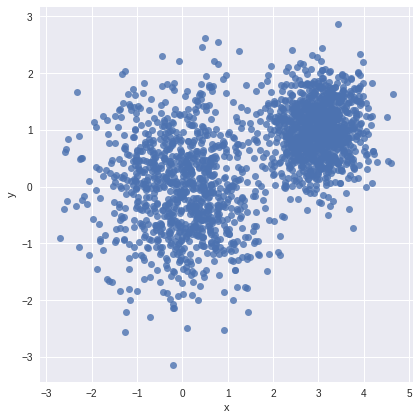

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.DataFrame({"x": [v[0] for v in conjunto_puntos],"y": [v[1] for v in conjunto_puntos]})
sns.lmplot("x", "y", data=df, fit_reg=False, size=6)
plt.show()

In [51]:
vectors = tf.constant(conjunto_puntos)
k = 4
centroides = tf.Variable(tf.slice(tf.random_shuffle(vectors),[0,0],[k,-1]))

expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroides = tf.expand_dims(centroides, 1)

assignments = tf.argmin(tf.reduce_sum(tf.square(tf.subtract(expanded_vectors,expanded_centroides)), 2), 0)

means = tf.concat(axis=0, values=[tf.reduce_mean(tf.gather(vectors, tf.reshape(tf.where(tf.equal(assignments, c)),[1,-1])), axis=[1]) for c in xrange(k)])

update_centroides = tf.assign(centroides, means)

init_op = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init_op)

for step in range(100):
    _, centroid_values, assignment_values = sess.run([update_centroides,centroides, assignments])

In [52]:
print centroid_values

[[ 3.28397465  1.10534906]
 [ 0.27227759 -0.71215403]
 [-0.50842428  0.56276405]
 [ 2.32505965  0.7994929 ]]


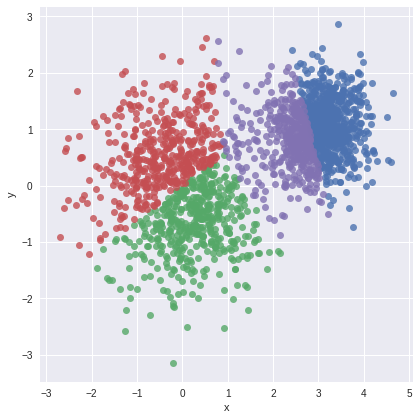

In [53]:
data = {"x": [], "y": [], "cluster": []}
for i in xrange(len(assignment_values)):
    data["x"].append(conjunto_puntos[i][0])
    data["y"].append(conjunto_puntos[i][1])
    data["cluster"].append(assignment_values[i])
df = pd.DataFrame(data)
sns.lmplot("x", "y", data=df,fit_reg=False, size=6,hue="cluster", legend=False)
plt.show()

## Utilitzant 2 clústers

En aquest cas k ha de ser 2.

In [54]:
vectors = tf.constant(conjunto_puntos)
k = 2
centroides = tf.Variable(tf.slice(tf.random_shuffle(vectors),[0,0],[k,-1]))

expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroides = tf.expand_dims(centroides, 1)

assignments = tf.argmin(tf.reduce_sum(tf.square(tf.subtract(expanded_vectors,expanded_centroides)), 2), 0)

means = tf.concat(axis=0, values=[tf.reduce_mean(tf.gather(vectors, tf.reshape(tf.where(tf.equal(assignments, c)),[1,-1])), axis=[1]) for c in xrange(k)])

update_centroides = tf.assign(centroides, means)

init_op = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init_op)

for step in range(100):
    _, centroid_values, assignment_values = sess.run([update_centroides,centroides, assignments])

In [55]:
print centroid_values

[[-0.07184089 -0.06677999]
 [ 2.951998    0.98926276]]


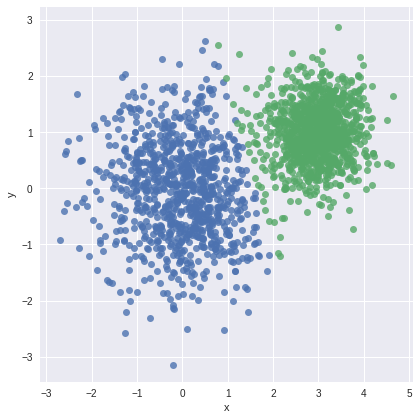

In [56]:
data = {"x": [], "y": [], "cluster": []}
for i in xrange(len(assignment_values)):
    data["x"].append(conjunto_puntos[i][0])
    data["y"].append(conjunto_puntos[i][1])
    data["cluster"].append(assignment_values[i])
df = pd.DataFrame(data)
sns.lmplot("x", "y", data=df,fit_reg=False, size=6,hue="cluster", legend=False)
plt.show()